# Neural Network Exploration with Digit Data 
This notebook will be used to model handwritten digits data and explore the internal workings of Neural Network

# Import Modules

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import output_notebook, figure, show
from bokeh.layouts import row
output_notebook()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


#import models
import tensorflow as tf
from keras import models, layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Loading BokehJS ...

# EDA

In [2]:
train = pd.read_csv('../input/downloaded-minst-data/train.csv',index_col=0)
train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
test = pd.read_csv('../input/downloaded-minst-data/test.csv',index_col=0)
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


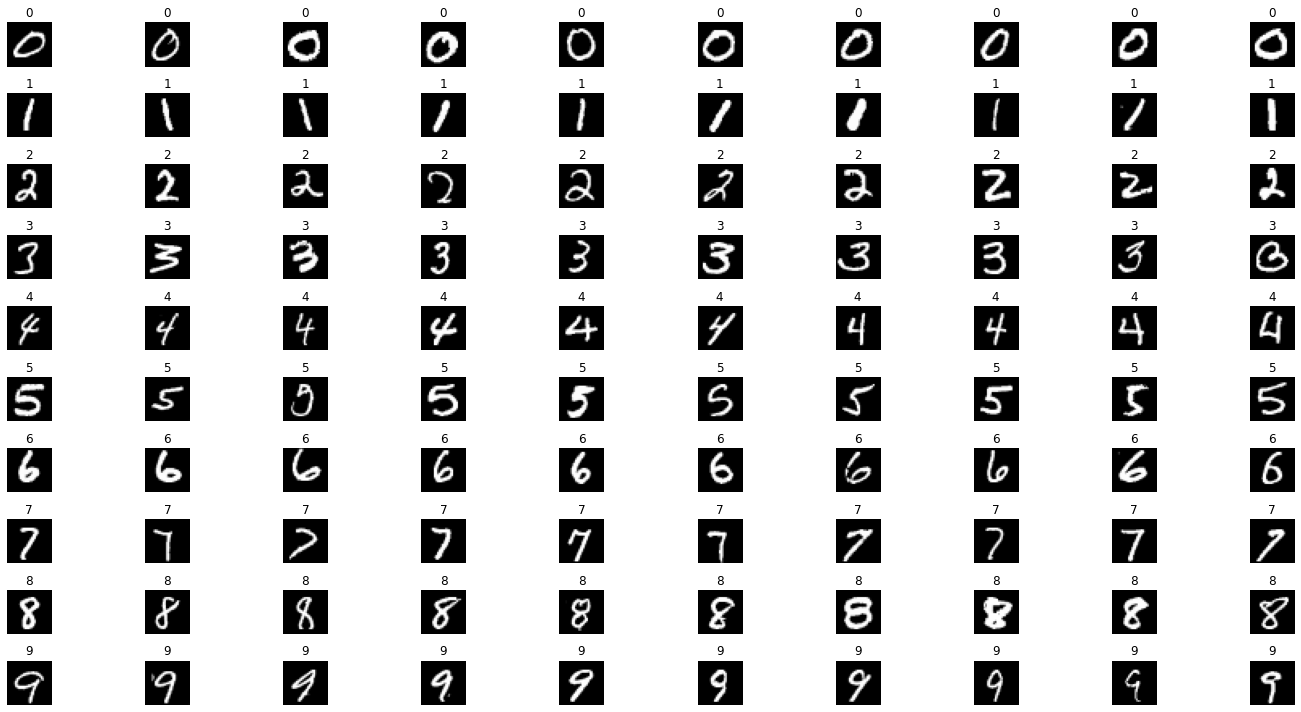

In [4]:
# Plot digits from the data
class_id = train['label'].sort_values().unique()
i=0

plt.figure(figsize=(20,10))
for c in class_id:
    dig_mtx = train[train['label']==c]
    rdm_index = np.random.randint(0,len(dig_mtx),10)
    for r in rdm_index:
        pic=dig_mtx.iloc[r,1:]
        pic_np=np.array(pic).reshape(28,28)
        plt.subplot(10,10,i+1)
        plt.imshow(pic_np,cmap='binary_r')
        plt.axis('off')
        plt.title(c)
        i+=1
plt.tight_layout()

## Data Preparation

In [5]:
# Defining X & Y variables 
x = train.drop(columns=['label'])
y = train['label']

# splitting train and test data sets
train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.1, random_state=0)

#Normalize data
tr_x=np.array(train_x)/255
va_x=np.array(valid_x)/255

# Convert y-variables to categorical
train_y_cat = np.array(to_categorical(train_y, num_classes=10))
valid_y_cat = np.array(to_categorical(valid_y, num_classes=10))


# Create text x and y variables
test_x= np.array(test.drop(columns=['label']))/255
test_y = test['label']


In [6]:
len(train_x)

54000

## Helper Code

In [7]:
def create_plot(train_accuracy,val_accuracy, train_loss, val_loss):
    x_plt = np.arange(0,len(train_accuracy),1)

    #Accuracy Plot
    p=figure(plot_width=700, plot_height=350, title ='Training & Test Accuracy', x_axis_label='Epoch', y_axis_label='Accuracy')
    p.line(x=x_plt, y=train_accuracy, legend_label='Training Accuracy', line_width=3)
    p.line(x=x_plt, y=val_accuracy, legend_label='Validation Accuracy', color ='green', line_width=3)

    #loss Plot
    q=figure(plot_width=600, plot_height=350, title ='Training & Test Loss', x_axis_label='Epoch', y_axis_label='Accuracy')
    q.line(x=x_plt, y=train_loss, legend_label='Training Loss', line_width=3)
    q.line(x=x_plt, y=val_loss, legend_label='Validation Loss', color ='green', line_width=3)
    
    show(row(p,q))

## Simple NN model

## Experiment 1 - One hidden Layer, One node

In [8]:
# defining input and output sizes
input_size = 784
output_size = 10

In [9]:
# create NN model
m1 = models.Sequential()
m1.add(layers.Dense(1, activation ='relu', input_shape =(1, input_size)))
m1.add(layers.Dense(output_size, activation='softmax'))
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 1)              785       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 10)             20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile NN model
m1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Early Stopping 
es=EarlyStopping(monitor='val_accuracy', mode='average', verbose=0, patience=5)

# Fit the model 
m1history = m1.fit(tr_x, train_y_cat, validation_data=(va_x,valid_y_cat),epochs=100,callbacks=es, batch_size=128, verbose=0)

In [12]:
#Summarizing results
train_loss = m1history.history['loss']
val_loss =m1history.history['val_loss']
train_accuracy = m1history.history['accuracy']
val_accuracy = m1history.history['val_accuracy']

In [13]:
#Create Plot
create_plot(train_accuracy,val_accuracy, train_loss, val_loss)

In [14]:
#Evaluate on validation data set
y_pred=m1.predict_classes(test_x)

In [15]:
#Confusion Matrix
cm = confusion_matrix(y_pred, test_y)
cm_df=pd.DataFrame(cm, columns=[x for x in range(10)])
cm_df.index=[x for x in range(10)]

#Print Confusio Matrix
cm_df

,0,1,2,3,4,5,6,7,8,9
0,38,0,53,12,2,19,46,0,9,0
1,3,946,50,202,163,116,4,53,296,63
2,86,8,216,116,10,214,85,6,90,6
3,17,54,130,424,25,280,12,12,414,12
4,0,115,9,39,470,11,1,177,40,274
5,17,6,97,155,6,190,14,5,96,5
6,819,6,472,49,4,50,796,1,20,6
7,0,0,1,7,6,9,0,630,3,293
8,0,0,0,0,0,0,0,0,0,0
9,0,0,4,6,296,3,0,144,6,350


In [16]:
#Classification report
cr=classification_report(y_pred,test_y, target_names=[x for x in range(10)], output_dict=True)
cr_df =pd.DataFrame(cr).transpose()
cr_df=np.round(cr_df,2)
cr_df

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.04,0.21,0.07,179.00
1,0.83,0.50,0.62,1896.00
2,0.21,0.26,0.23,837.00
3,0.42,0.31,0.35,1380.00
4,0.48,0.41,0.44,1136.00
5,0.21,0.32,0.26,591.00
6,0.83,0.36,0.50,2223.00
7,0.61,0.66,0.64,949.00
8,0.00,0.00,0.00,0.00
9,0.35,0.43,0.39,809.00


In [17]:
test_accuracy=cr['accuracy']

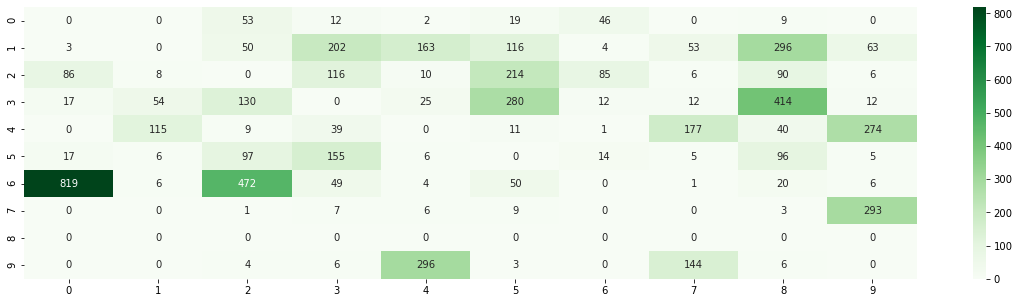

In [18]:
#Visulaize the CM
sns_df = cm_df

#TO visualize descrepencies, we will remove all diagonal values
for i in range (10):
    sns_df.iloc[i,i]=0
    
plt.figure(figsize=(20,5))
sns.heatmap(sns_df, cmap='Greens', annot=True, fmt='g')

From the plot above, the items most mis-characterized are the following: 

* 0 for 2
* 0 for 3
* 0 for 6
* 1 for 4
* 2 for 3
* 2 for 6
* 3 for 1
* 9 for 7

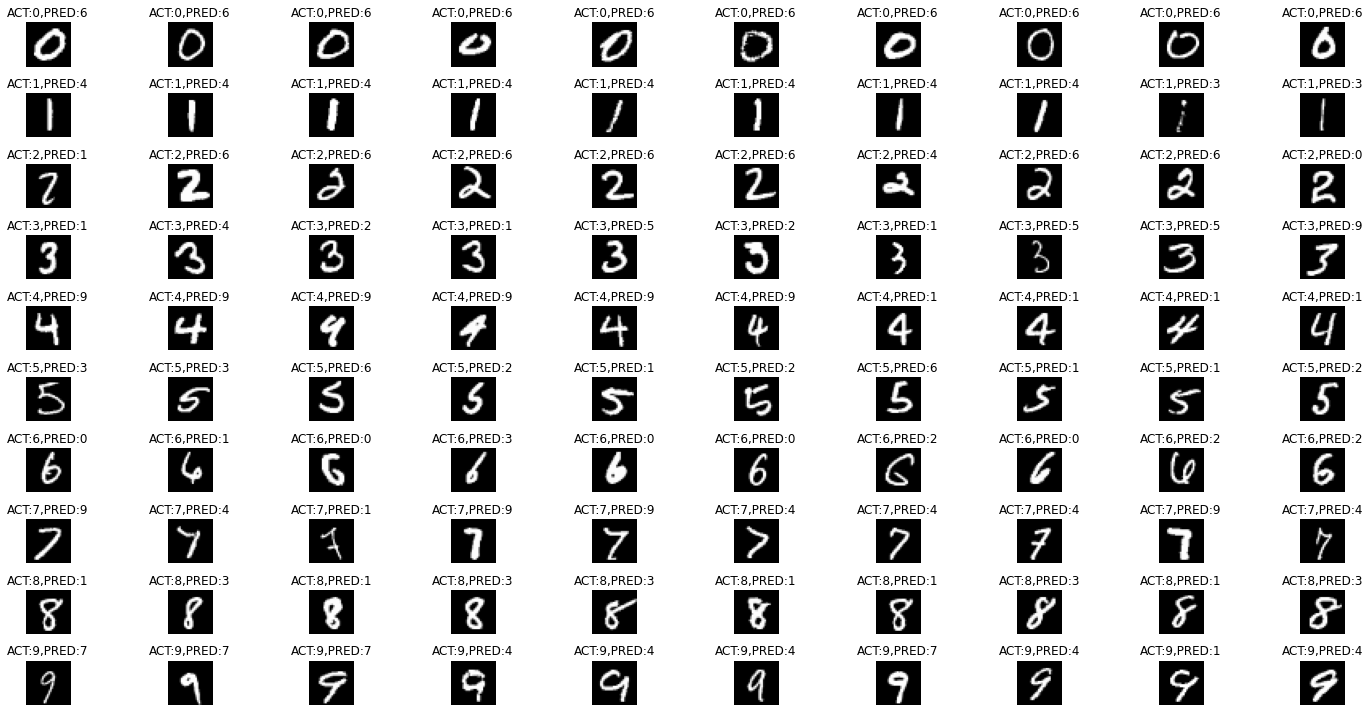

In [19]:
#visualization of items not predicted properly

test['predicted']=y_pred

# Plot digits from the data
class_id = test['label'].sort_values().unique()
i=0

plt.figure(figsize=(20,10))

for c in class_id:
    dig_mtx = test[(test['label']==c) & (test['predicted']!=c)]
    
    for r in range(10):
        rdm_index = np.random.choice(dig_mtx.index)
        pic=dig_mtx.loc[rdm_index]
        pic_np=np.array(pic.iloc[0:784]).reshape(28,28)
        plt.subplot(10,10,i+1)
        plt.imshow(pic_np,cmap='binary_r')
        plt.axis('off')
        title='ACT:'+str(test.loc[rdm_index,'label'])+',PRED:'+str(test.loc[rdm_index,'predicted'])
        plt.title(title)
        i+=1
plt.tight_layout()


# Task 10: Analyzing the activation values of the hidden nodes

#### code from github repository provided


## Step 1: Getting the activation values of the hidden nodes

In [20]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in m1.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=m1.input, outputs=layer_outputs)

In [21]:
# Get the outputs of all the hidden nodes for each of the 60000 training images

x_train_norm = np.concatenate((tr_x, va_x), axis=0)
activations = activation_model.predict(x_train_norm)
hidden_layer1_activation = activations[0]
output_layer_activations = activations[1]

## Step 2: Creating a dataframe with the activation values and predicted classes

In [22]:
#Get the dataframe of all the node values

pred_classes=m1.predict_classes(x_train_norm)


activation_data = {'pred_class':pred_classes}
for k in range(0,1): 
    activation_data[f"act_val_{k}"] = hidden_layer1_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head()

,pred_class,act_val_0
0,7,8.349826
1,1,3.810409
2,1,3.115833
3,6,0.000000
4,3,2.163043


## Step 3: Visualualizing the activation values with boxplots

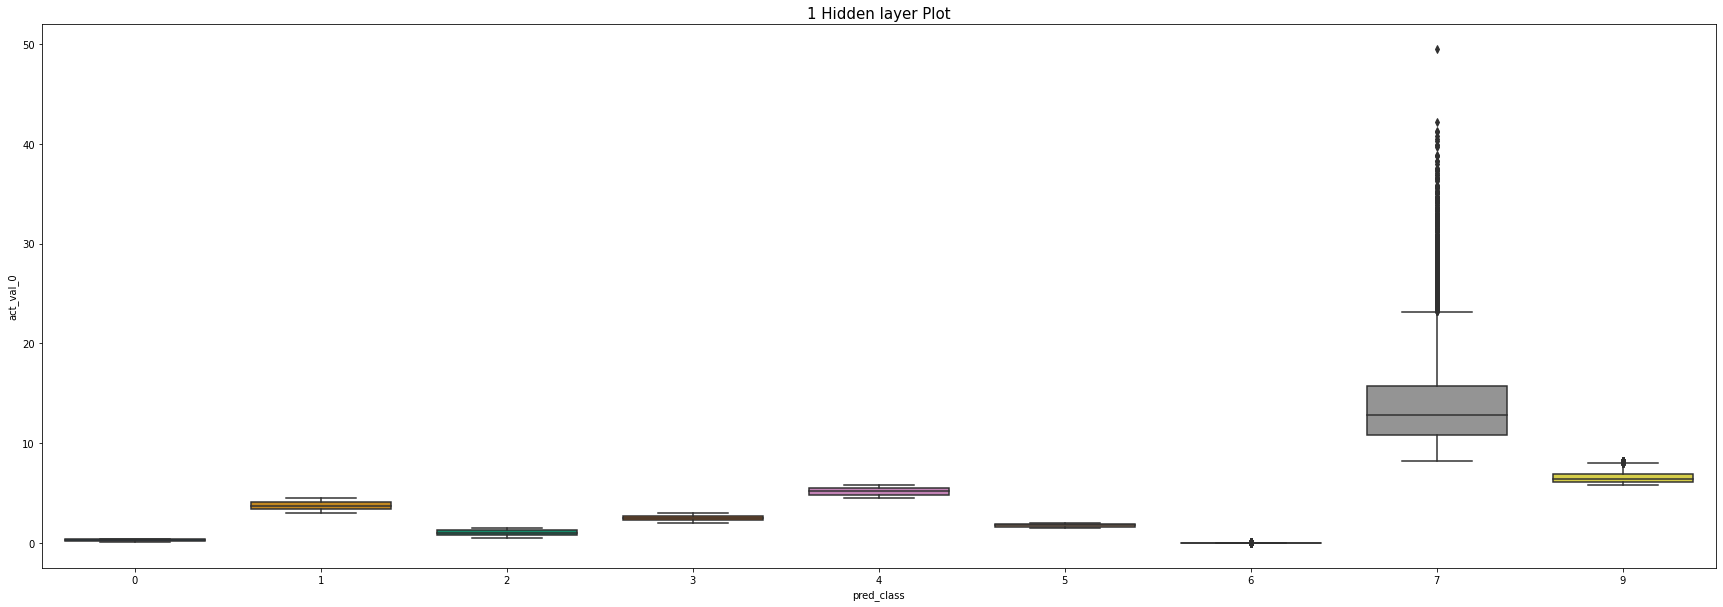

In [23]:
# To see how closely the hidden node activation values correlate with the class predictions
plt.figure(figsize=(30,10))
bplot = sns.boxplot(y='act_val_0', x='pred_class', 
                 data=activation_df[['act_val_0','pred_class']], 
                 width=0.75,
                 palette="colorblind")
plt.title('1 Hidden layer Plot', fontsize=15);

As can be observed from the plot above, the 1 hidden layer NN classifies the digit 6 at greater accuracy than the rest of the digits. The test accuracy for this m1 model is 42%. 

## Experiment 2: NN model with vaious nodes

In [24]:
n=[1]
mod = [m1]
train_acc =[train_accuracy]
val_acc =[val_accuracy]
tr_loss = [train_loss]
v_loss = [val_loss]
test_acc = [test_accuracy]


In [25]:
# create NN models

for nodes in [2,4,8,16,32, 64, 128, 256, 512, 1024]:
    m = models.Sequential()
    m.add(layers.Dense(nodes, activation ='relu', input_shape =(1, input_size)))
    m.add(layers.Dense(output_size, activation='softmax'))

    # compile NN model
    m.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])


    #Early Stopping 
    es=EarlyStopping(monitor='val_accuracy', mode='average', verbose=0, patience=5)

    # Fit the model 
    mhistory = m.fit(tr_x, train_y_cat, validation_data=(va_x,valid_y_cat),epochs=100,callbacks=es, batch_size=128, verbose=0)

    #Summarizing results
    train_loss = mhistory.history['loss']
    val_loss =mhistory.history['val_loss']
    train_accuracy = mhistory.history['accuracy']
    val_accuracy = mhistory.history['val_accuracy']

    
    #Evaluate on validation data set
    y_pred=m.predict_classes(test_x)
    diff =test_y - y_pred
    diff=pd.DataFrame(diff)
    test_accuracy = (diff[diff==0].count()/len(diff))[0]

    #Save results
    n.append(nodes)
    mod.append(m)
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)
    tr_loss.append(train_loss)
    v_loss.append(val_loss)
    test_acc.append(test_accuracy)

In [26]:
p = figure(plot_width=700, plot_height=400, title='Test Accuracy', x_axis_label='Number of Nodes', y_axis_label='Accuracy')
p.line(x=n, y=test_acc, legend_label='Test Accuracy', line_width=3)
p.legend.location ='bottom_right'
show(p)


64 nodes is the best model 

## Experiement 4: PCA for dimension reduction

In [27]:
#PCA variables
pca = PCA(n_components=154)


pca_train_x=pca.fit_transform(tr_x)
pca_valid_x=pca.transform(valid_x)
pca_test_x =pca.transform(test_x)

In [28]:
# crun the best model from earlier with or without PCA and compare

m = models.Sequential()
m.add(layers.Dense(32, activation ='relu', input_shape =(1, 154)))
m.add(layers.Dense(output_size, activation='softmax'))

# compile NN model
m.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])


#Early Stopping 
es=EarlyStopping(monitor='val_accuracy', mode='average', verbose=0, patience=5)

# Fit the model 
mhistory = m.fit(pca_train_x, train_y_cat, validation_data=(pca_valid_x,valid_y_cat),epochs=100,callbacks=es,batch_size=128, verbose=0)

#Summarizing results
train_loss = mhistory.history['loss']
val_loss =mhistory.history['val_loss']
train_accuracy = mhistory.history['accuracy']
val_accuracy = mhistory.history['val_accuracy']


#Evaluate on validation data set
y_pred=m.predict_classes(pca_test_x)
diff =test_y - y_pred
diff=pd.DataFrame(diff)
test_accuracy = (diff[diff==0].count()/len(diff))[0]
print('Test Accuracy is: ', np.round(test_accuracy*100,2),'%')
create_plot(train_accuracy, val_accuracy, train_loss, val_loss)

Test Accuracy is:  96.81 %


## Experiment 5: Random Forest

In [29]:
# fit a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x,y)

RandomForestClassifier(random_state=42)

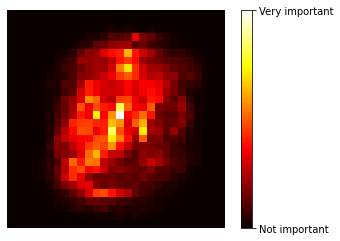

In [30]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rf.feature_importances_)
cbar = plt.colorbar(ticks=[rf.feature_importances_.min(), rf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [31]:
#Analyzing the number of pixels that hold the most importance

features_imp = np.sort(rf.feature_importances_)

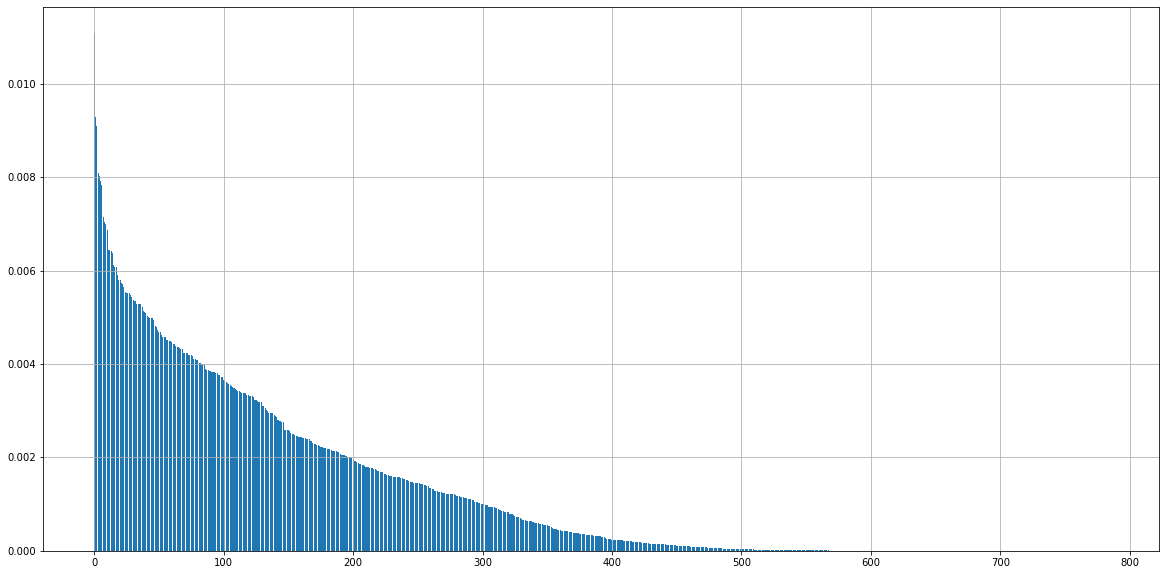

In [32]:
plt.figure(figsize=(20,10));
plt.bar(np.arange(0,784,1),features_imp[::-1]);
plt.grid()

In [33]:
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
n = 400
imp_arr = rf.feature_importances_
idx = (-imp_arr).argsort()[:n]  

In [34]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = test_x[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 400), (10000, 400))

### Visualizing pixels[](http://)

In [35]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

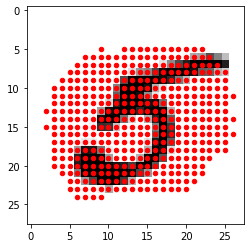

In [36]:
plt.imshow(x_train_norm[10].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)